<a href="https://colab.research.google.com/github/josh130588/MLAIMAR2024/blob/main/CaseStudy02_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the dataset
url = 'Wholesale customers data.csv'
df = pd.read_csv(url)

# Display first few rows and information about the dataset
print(df.head())
print(df.info())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

In [4]:
#Step 2: Data Preprocessing

# Check for missing values (if any) and handle them
print(df.isnull().sum())

# Remove any rows with missing values or handle them based on domain knowledge

# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert scaled data back to DataFrame for ease of use
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

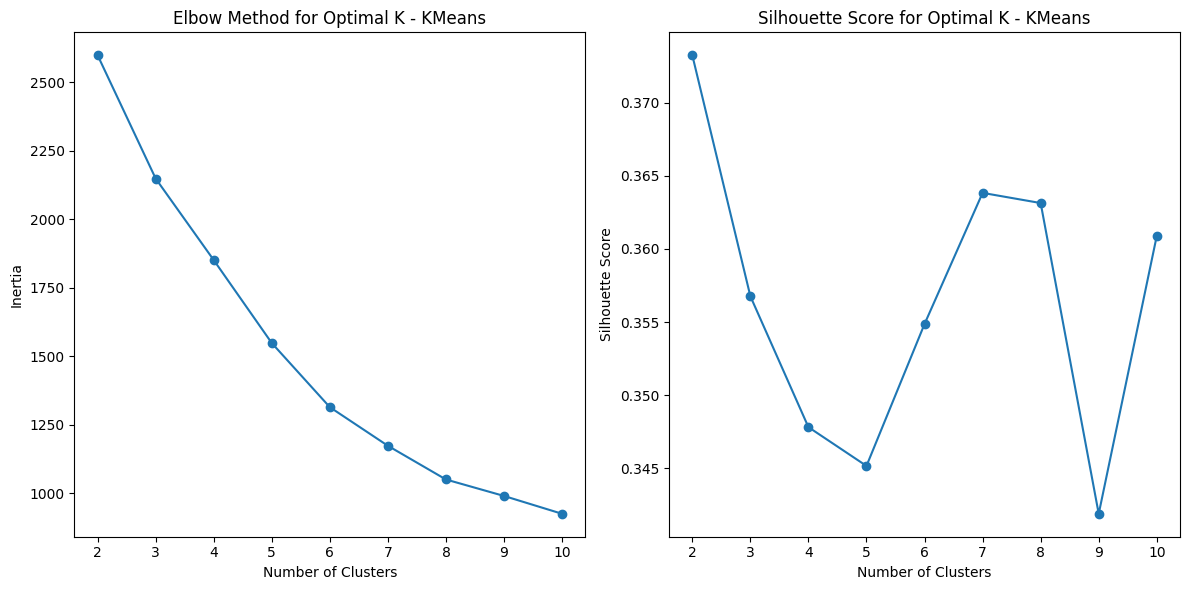

In [5]:
#Step 3: Trying Different Clustering Models and Finding Optimal Number of Clusters
#K-Means Clustering

# Function to determine the optimal number of clusters using Elbow Method
def find_optimal_clusters_kmeans(data, max_k):
    inertia = []
    silhouette = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        if k > 1:
            silhouette.append(silhouette_score(data, kmeans.labels_))
        else:
            silhouette.append(0)
    return inertia, silhouette

# Apply the function and visualize results
max_k = 10  # maximum number of clusters to test
inertia, silhouette = find_optimal_clusters_kmeans(df_scaled, max_k)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_k+1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K - KMeans')

plt.subplot(1, 2, 2)
plt.plot(range(2, max_k+1), silhouette, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K - KMeans')

plt.tight_layout()
plt.show()

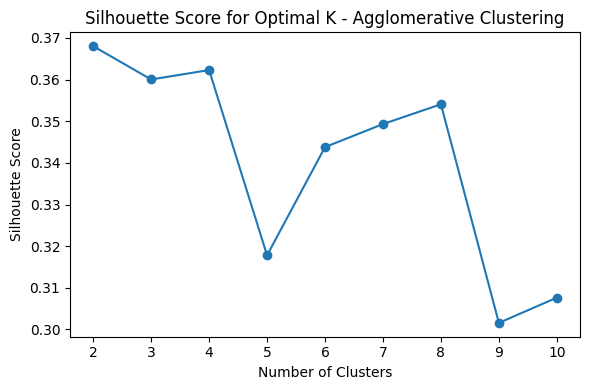

In [6]:
#Hierarchical Agglomerative Clustering

# Function to determine the optimal number of clusters using Agglomerative Clustering
def find_optimal_clusters_agglomerative(data, max_k):
    silhouette = []
    for k in range(2, max_k+1):
        agg = AgglomerativeClustering(n_clusters=k)
        agg.fit(data)
        if k > 1:
            silhouette.append(silhouette_score(data, agg.labels_))
        else:
            silhouette.append(0)
    return silhouette

# Apply the function and visualize results
silhouette_agg = find_optimal_clusters_agglomerative(df_scaled, max_k)

plt.figure(figsize=(6, 4))
plt.plot(range(2, max_k+1), silhouette_agg, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K - Agglomerative Clustering')

plt.tight_layout()
plt.show()


In [7]:
#Step 4: Creating Clustering Models with Optimal Number of Clusters
#Based on the elbow method and silhouette scores from the above plots, choose the optimal number of clusters for K-Means and Agglomerative clustering.

# Example: Creating K-Means model with optimal number of clusters
optimal_k_kmeans = 3  # Example optimal number of clusters based on analysis
kmeans_model = KMeans(n_clusters=optimal_k_kmeans, random_state=42)
kmeans_model.fit(df_scaled)

# Example: Creating Agglomerative Clustering model with optimal number of clusters
optimal_k_agg = 3  # Example optimal number of clusters based on analysis
agg_model = AgglomerativeClustering(n_clusters=optimal_k_agg)
agg_model.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AgglomerativeClustering(n_clusters=3)

In [8]:
#Step 5: Perform DBSCAN Clustering
# Example: Performing DBSCAN Clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_model.fit(df_scaled)

DBSCAN()

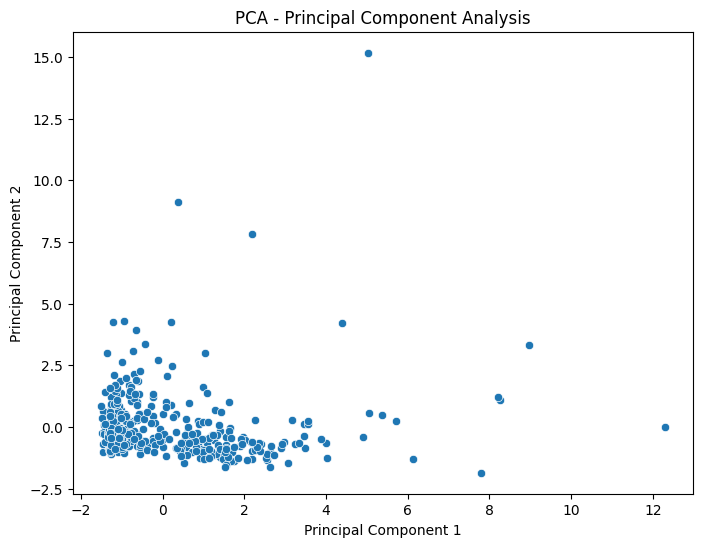

In [9]:
#Step 6: Perform PCA for Dimensionality Reduction

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

# Create DataFrame for PCA results
df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA - Principal Component Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()